# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

Varianzas similares, usamos prueba t estándar
t: -3.5383, p: 0.0041
Conclusión: Rechazamos H₀


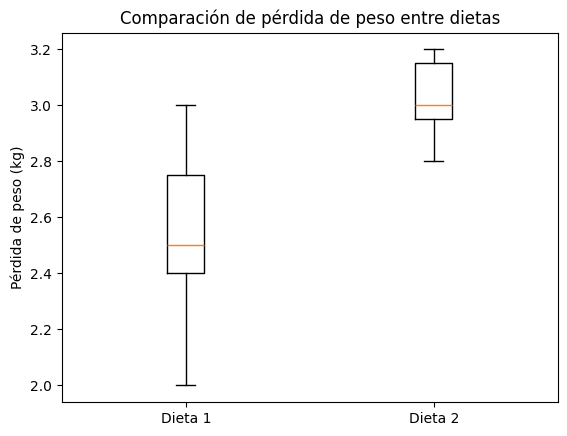

In [ ]:
# TODO
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos.
dieta_1 = np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
dieta_2 = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])

# Igualdad de varianza.
p_levene = stats.levene(dieta_1, dieta_2)[1]

# Selección de prueba t.
if p_levene < 0.05:
    t_stat, p_valor = stats.ttest_ind(dieta_1, dieta_2, equal_var=False)
    print("Varianzas distintas")
else:
    t_stat, p_valor = stats.ttest_ind(dieta_1, dieta_2, equal_var=True)
    print("Varianzas similares, usamos prueba t estándar")

# Resultado uso 4.f para que solo aparezcan 4 decimales.
print(f"t: {t_stat:.4f}, p: {p_valor:.4f}")

# Hipótesis.
print("Conclusión:", "Rechazamos H0" if p_valor < 0.05 else "No rechazamos H0")

# Boxplot.
plt.boxplot([dieta_1, dieta_2], tick_labels=['Dieta 1', 'Dieta 2'])
plt.title("Comparación de pérdida de peso entre dietas")
plt.ylabel("Pérdida de peso (kg)")
plt.show()

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

ANOVA: F = 20.3158, p = 0.0001
Conclusión: Rechazamos H₀


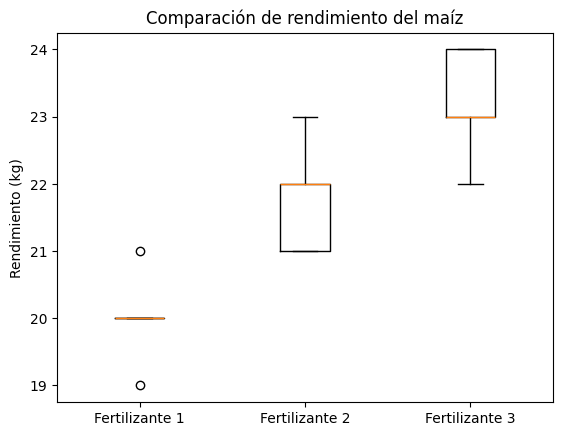

In [7]:
# TODO
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos.
fertilizante_1 = np.array([20, 21, 20, 19, 20])
fertilizante_2 = np.array([22, 21, 23, 22, 21])
fertilizante_3 = np.array([24, 23, 22, 23, 24])

# ANOVA
anova_stat, p_valor = stats.f_oneway(fertilizante_1, fertilizante_2, fertilizante_3)
# Utilizo .4f para que solo aparezcan 4 decimales.
print(f"ANOVA: F = {anova_stat:.4f}, p = {p_valor:.4f}")

# Hipótesis
print("Conclusión:", "Rechazamos H₀" if p_valor < 0.05 else "No rechazamos H₀")

# Boxplot
plt.boxplot([fertilizante_1, fertilizante_2, fertilizante_3], tick_labels=['Fertilizante 1', 'Fertilizante 2', 'Fertilizante 3'])
plt.title("Comparación de rendimiento del maíz")
plt.ylabel("Rendimiento (kg)")
plt.show()